In [ ]:
'''
URJC / GIA / Aprendizaje Automático 1 / Curso 23-24
alfredo.cuesta@urjc.es
'''
import pandas as pd
import random
pd.set_option("display.precision", 2)

#Separación de datos

**NUNCA** podemos utilizar todos los ejemplos que nos den para aprender la tarea. <br>
El motivo es muy simple. El **objetivo final** es tener una máquina que debe funcionar de manera autónoma, reaccionando a nuevos ejemplos que le lleguen una vez sea desplegada y arrancada en el *lugar de trabajo*. <br>
¿Cómo sabemos si funcionará bien si nunca la hemos probado con ejemplos que jamas haya visto durante su entrenamiento?

Cuando recibimos un conjunto de datos, lo primero que se debe hacer siempre es reservar entre un 10% y un 20% de éstos, con los que formamos el **Conjunto de Test**.
Al resto le denominaremos **Conjunto de Entrenamiento**
<br>
Este conjunto de Test se debe guardar y NO utilizar hasta que tengamos nuestra máquina completamente terminada.

En ese momento recuperamos el conjunto de Test y se lo damos a nuestra máquina para que realice la tarea. De esta manera podemos evaluar cómo de bien o mal está realizandola sobre datos totalmente nuevos para ella.


### Ejemplo

Vamos a utilizar el conjunto de datos "california_housing_train.csv", que viene por defecto en todo Google Colab y obtener a partir de él dos conjuntos en forma de dataframe.

In [ ]:
folder_name = 'sample_data/'
file_name = 'california_housing_train.csv'
fullSet = pd.read_csv(folder_name+file_name)
N,D = fullSet.shape

In [ ]:
flag_save_test = False
fraction_test = 0.2

idx = fullSet.index.tolist()
random.shuffle(idx)

N_test = int(N*fraction_test)
testSet = fullSet.iloc[idx[:N_test]]
trainSet = fullSet.iloc[idx[N_test:]]

print(f'El tamaño del conj. de entrenamiento es: ',trainSet.shape)
print(f'El tamaño del conj. de test es: ',testSet.shape)

if flag_save_test:
  test_folder = "....." #<- ruta de la carpeta, por ejemplo "sample_data/"
  test_name   = "....." #<- nombre del CSV donde guardamos testSet
  testSet.to_csv(test_folder + test_name, dec='.', sep=';', header=True)

El tamaño del conj. de entrenamiento es:  (13600, 9)
El tamaño del conj. de test es:  (3400, 9)


De esta manera tenemos un dataframe llamado `trainSet` a partir del cual podemos seguir, y un dataframe `testSet` que hemos guardado para más adelante.

Es una buena idea guardar trainSet en un CSV también.
Así podemos recargarlo si en algún momento tenemos que empezar de cero otra vez.

Sin embargo, guardar un 10% o 20% de los ejemplos cuando solo hay unos pocos no es la mejor opción. Este ejemplo da una idea general de qué se debe hacer, pero luego hay casos que requieren de un tratamiento un poco diferente.
<br>
Según aparezcan los iremos explicando.

La biblioteca **Scikit-Learn** proporciona métodos para la separación del conjunto de ejemplos dado. Cuando comencemos a aprender modelos utilizaremos estos métodos, sobretodo si se trata de estos casos que comentamos arriba.

# Exploración de los datos

La **exploración de datos** es el proceso que se sigue para comprender los datos y las relaciones entre ellos.

## Descripción estadística básica

El primer paso es hacer una descripción estadística básica del conjunto de ejemplos que hemos recibido para entrenar nuestro modelo.

Podemos pensar que tenemos que generar un informe que resuma y, si es posible, proporcione información sobre el tipo de dato de los ejemplos, y como están descritos (es decir los atributos con los que viene definido).

Este informe debería contener al menos:
- Tamaño del conjunto de datos, es decir de la tabla<br>
  $N=?, D=?$
- Localizar aquellos atributos que NO son numéricos y convertirlos.
- Media y desviación estandard de cada atributo<br>
  $\mu(x_i)=?$, $\sigma_i(x_i)=?$ , para $i=1\ldots D$.
- Mediana de cada atributo<br>
  $Q_{50}(x_i)=?$
- Moda de cada atributo<br>
  $\text{Moda}(x_i) = ?$
- Máximo y mínimo de cada atributo<br>
  $\max(x_i)= ?$  , $\min(x_i)= ?$

Como se puede ver, son estadísticos básicos que asumen que TODOS los atributos $x_i, \text{con } i = 1\ldots D,$ son numéricos.<br>
En caso de que inicialmente hubiera atributos categóricos conviene recogerlos en un listado explicando cómo se han transformado


### Ejemplo

En este ejemplo cargaremos de nuevo el conjunto de datos "california_housing_train.csv" completo y veremos algunos métodos útiles para obtener información del dataframe. <br>
(recuerda que viene por defecto en todo Google Colab)

In [ ]:
folder_name = 'sample_data/'
file_name = 'california_housing_train.csv'
trainSet = pd.read_csv(folder_name+file_name)

- Como ya hemos visto, `shape` nos devuelve $N$ y $D$.
- Podemos ver el tipo de dato con `dtypes`.

In [ ]:
N,D = trainSet.shape
print(f'Número de ejemplos = {N}, Dimensionalidad = {D}')
print('\nTipo de dato de cada atributo:')
trainSet.dtypes

Número de ejemplos = 17000, Dimensionalidad = 9

Tipo de dato de cada atributo:


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

Alternativamente, se puede usar también `info()`, que además hace un recuento de los tipos de datos diferentes que hay (tercera línea empezando por abajo)

In [ ]:
print(trainSet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None


Para obtener una descripción estadística básica podemos utilizar `describe()`

In [ ]:
trainSet.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00
mean,-119.56,35.63,28.59,2643.66,539.41,1429.57,501.22,3.88,207300.91
std,2.01,2.14,12.59,2179.95,421.50,1147.85,384.52,1.91,115983.76
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.79,33.93,18.00,1462.00,297.00,790.00,282.00,2.57,119400.00
50%,-118.49,34.25,29.00,2127.00,434.00,1167.00,409.00,3.54,180400.00
75%,-118.00,37.72,37.00,3151.25,648.25,1721.00,605.25,4.77,265000.00
max,-114.31,41.95,52.00,37937.00,6445.00,35682.00,6082.00,15.00,500001.00


En esta descripción se echa de menos la moda.

In [ ]:
trainSet.mode(axis=0, dropna=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-118.31,34.06,52.0,1582.0,280.0,891.0,306.0,3.12,500001.0
1,NaN,NaN,NaN,NaN,NaN,NaN,386.0,NaN,NaN


El resultado de `mode()` es diferente a los anteriores porque puede haber más de una moda; así que devuelve un array.

En este caso el array tiene dos valores porque **"households" tiene 2 modas**: los valores 306 y 386 se repiten el mismo número de veces y más que ningún otro.
Por ese motivo se rellena con NaN el resto de celdas de la segunda fila.

## Visualización de la distribución de los datos

La descripción estadística nos da cierta idea de la distribución de los datos que tenemos en la tabla de una manera cuantitativa.

Para obtener información cualitativa y hacernos una mejor idea de las distribuciones, recurrimos a una figura que muestre los ejemplos de la tabla.

Dado que los ejemplos son $D$-dimensionales y la pantalla solo tiene 2 dimensiones, una primera manera de mostrar los ejemplos es emparejando los atributos de dos en dos.

Para ellos utilizamos el método `plotting.scatter_matrix` de Pandas.

array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='latitude'>,
        <Axes: xlabel='population', ylabel='latitude'>,
        <Axes: xlabel='households', ylabel='latitude'>,
        <Axes: xlabel='median_income', ylabel='latitude'>,
    

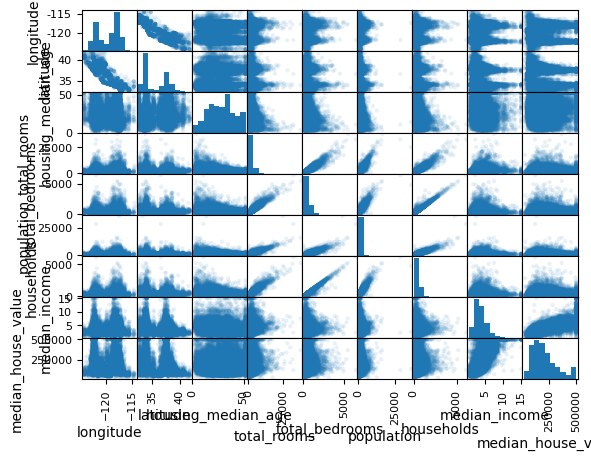

In [ ]:
pd.plotting.scatter_matrix(trainSet, alpha=0.1)

En la figura se aprecia lo siguiente:
- El gráfico $(i,j)$ es el transpuesto de $(j,i)$ para cualquier par $(i,j)$ siempre que $i\neq j$, es decir los que están fuera de la diagonal principal.
- Estos muestran con un punto el par de atributos $(x_i,x_j)$ de cada ejemplo del conjunto.
- En la diagonal se muestra un histograma de los valores que toma cada atributo. El histograma es una aproximación más realista a cómo están realmente distribuidos los valores que los estadísticos.
<br>
En concreto, podemos observar que ninguna de las distribuciones es simétrica.<br>
  Esto significa que los valores de media y desviación que hemos calculado para cada atributo no son estimadores de la distribución $p(x_i)$.  
  Es decir, aunque los calculemos no podemos asumir que la distribución de ese atributo es $\mathcal{N}(x_i; \mu_i, \sigma_i)$.
  <br>
  También se puede ver que varios atributos tienen distribuciones con dos máximos ("distribuciones multimodales")

# Preprocesado de datos

Estos estudios previos que hemos hecho sobre los datos son sencillos y nos ayudan a conocer mejor los datos. Si es posible hacer esto, y en muchos problemas reales efectivamente lo es, este estudio ayuda mucho a obtener buenos modelos y buenas máquinas.

Pero ¿qué ocurriría si en vez de 9 atributos tenemos 90? ¿y 900? ¿y 9.000?<br>
  Por ejemplo, en bases de datos de ingeniería genética podemos encontrar tablas con 40.000 columnas. En bases de datos de consumo eléctrico por vivienda podemos encontrar tablas de 150.000 columnas, una por cliente, y cada fila es un día diferente.

En estos casos, no es práctico intentar visualizar los datos; la figura de antes ya era bastante farragosa y solo había 9.
<br>
Tampoco tiene mucho sentido imprimir un informe porque para inspeccionarlo necesitaríamos mucho tiempo y espacio. Para hacernos una idea pensemos que en una página caben aproximadamente 50 líneas de texto a espaciado sencillo.

La solución consiste en desarrollar métodos que sean capaces de procesar y preparar los datos de manera automática, requiriendo la menor intervención humana posible.

Entre las tareas que podemos automatizar están:
- Localización y tratamiento de datos perdidos<br>
$~$(en este cuaderno veremos varias maneras).
- Eliminar atributos innecesarios o seleccionar los atributos que finalmente vamos a utilizar<br>
$~$(estudiaremos estas técnicas más adelante).


## Tratamiento de valores perdidos

Los valores perdidos (*missing*) son más frecuentes de lo que se puede pensar. <br>
Por ejemplo, en registros médicos, algunas veces no se tomó la temperatura porque había pocos enfermeros debido a una saturación de las emergencias. O en datos recogidos mediante encuesta por internet el consultado no rellenó varios campos que no eran obligatorios. También puede ocurrir en datos recogidos por diferentes sensores donde por algún motivo uno o varios se han apagado durante un tiempo.

Para tratar los valores perdidos debemos:
1. Averiguar dónde están
2. Valorar si rellenamos los huecos (imputación de valores perdidos) <br>
o tomamos otra decisión como eliminar el ejemplo el atributo.
3. Opcionalmente se puede añadir un nueva columna a la derecha de aquella donde se hayan imputado valores, marcando las celdas donde ha habido imputación como muestra la figura de abajo.

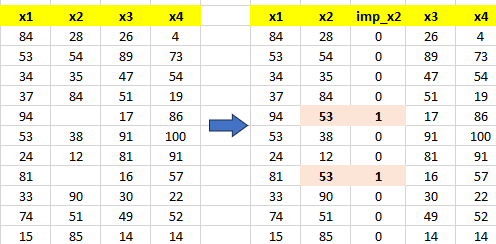



### Localización de valores perdidos

En Pandas los métodos `isnull()` e `isna()` devuelven un booleano (True o False) por cada celda del dataframe con un valor NaN.

No existe ninguna diferencia entre ambos métodos. Son idénticos.

#### Ejemplo

En este ejemplo descargamos de internet un conjunto de datos reales de concesión de crédito donde hay valores perdidos. <br>
Los valores perdidos están marcados por "?"

In [ ]:
# Descargar y descomprimir el fichero ZIP
!wget https://archive.ics.uci.edu/static/public/27/credit+approval.zip
import zipfile
from os import remove

extract_dir = 'sample_data/'
with zipfile.ZipFile('credit+approval.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
remove('credit+approval.zip') #<- al terminar borramos el ZIP

--2024-01-03 15:46:44--  https://archive.ics.uci.edu/static/public/27/credit+approval.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘credit+approval.zip’

credit+approval.zip     [ <=>                ]  13.58K  --.-KB/s    in 0.04s   

2024-01-03 15:46:45 (349 KB/s) - ‘credit+approval.zip’ saved [13901]



In [ ]:
# Crear el dataframe "credit_df" con el fichero de datos
folder_name = 'sample_data/'
file_name = 'crx.data'
credit_df = pd.read_csv(folder_name + file_name, header=None, sep=',')

A continuación utilizamos
- `replace('?',pd.NA)` para cambiar el "?" por el valor de Pandas NA para los valores perdidos, y luego..
- `isnull()` para localizar los valores perdidos.

In [ ]:
credit_df = credit_df.replace('?', pd.NA)
missing_data = credit_df.isna()
missing_values_per_column = missing_data.sum(axis=0)
mask_mayorq0 = missing_values_per_column > 0

print(f'el conjunto de datos tiene un total de {credit_df.shape[0]} ejemplos')
print(missing_values_per_column[mask_mayorq0])

el conjunto de datos tiene un total de 690 ejemplos
0     12
1     12
3      6
4      6
5      9
6      9
13    13
dtype: int64


Hemos imprimido las columnas que tienen algún NaN y cuantos hay en total en cada una de ellas.<br>
Como podemos ver, en el peor caso hay 13 valores perdidos en un total de 690 ejemplos (no llega al 2%), por lo que descartamos eliminar estas columnas por un "exceso" de valores perdidos.

¿Podemos decir lo mismo de las filas?

In [ ]:
missing_values_per_row = missing_data.sum(axis=1)
mask_mayorq0 = missing_values_per_row > 0

print(missing_values_per_row[mask_mayorq0])
print(f'el conjunto de datos es  {credit_df.shape[1]}-dimensional')

71     1
83     1
86     1
92     1
97     1
202    1
206    5
243    1
248    1
254    1
270    5
278    1
286    1
327    1
329    1
330    5
346    1
374    1
406    1
445    2
450    1
453    1
456    5
479    3
489    1
500    1
515    1
520    1
539    2
592    5
598    1
601    3
608    1
622    5
626    1
641    1
673    1
dtype: int64
el conjunto de datos es  16-dimensional


La serie de arriba muestra cuantos NaN hay en cada fila, en caso de que haya al menos 1. Para hacernos una mejor idea, podemos hacer un recuento con `value_counts()`

In [ ]:
missing_count = missing_values_per_row.value_counts().sort_index()
print(missing_count)

0    653
1     27
2      2
3      2
5      6
dtype: int64


En definitiva, hay 6 filas donde podemos encontrar 5 NaN de 15 atributos que hay en total, es decir 1/3 de los atributos de estos 6 ejemplos se ha perdido.

En principio, no sería necesario elimnar estos 6 ejemplos porque hay una gran mayoría de atributos de los que sí tenemos valores.<br>
Sin embargo, vamos a mostrar como se haría solo por el interés formativo.

In [ ]:
# Eliminamos ejemplos porque hay un número "excesivo" de atributos perdidos.

missing_count.index[-1]
mask_toDrop = missing_values_per_row >= missing_count.index[-1]
drop_list = missing_values_per_row[mask_toDrop].index.tolist()
credit_df.drop(drop_list, inplace=True)

print(f'Tras eliminar las filas con más NaN, tenemos una tabla de tamaño:',
      credit_df.shape)

Tras eliminar las filas con más NaN, tenemos una tabla de tamaño: (684, 16)


### Imputación Univariada

Vamos a **imputar** valores al resto de los NaN.

La técnica más sencilla es la **imputación univariada**; que consiste en  asignar un estadístico de la columna a todos los NaN que haya en ella; y repetir este proceso para cada columna.
<br>
Este estadístico puede ser:
- la **media**, si los valores de ese atributo están distribuidos según una normal.
- la **mediana**, si no lo están. Además la mediana es mejor opción si hubiera valores muy extremos dentro de esa columna (valores *outliers*).
- el **valor más repetido**, si se trata de una columna de valores categóricos.

En el siguiente código puedes ver un ejemplo de cómo funciona:

In [ ]:
# Ejemplo de cómo funciona la imputación univariada
dfoo = pd.DataFrame({'A': [1, 2, None, 4], 'B': [None, 6, 7, 8]})
dfoo.fillna(dfoo.median(axis=0),inplace=True)
dfoo

,A,B
0,1.0,7.0
1,2.0,6.0
2,2.0,7.0
3,4.0,8.0


El problema de esta técnica es que puede crear ejemplos imposibles. Veamos un par de casos:
1. Supón que tenemos una columna con una marca de tiempo de la que hemos perdido una celda.<br>
NO tiene sentido rellenar con la media ni la mediana de todas las marcas de tiempo. <br>
Sería mejor obtener el valor perdido mediante **interpolación** de la serie, por ejemplo con el método `interpolate()`.
2. Supón que tenemos un registro de datos médicos donde: <br>
  <ul>
  <li>una columna es el sexo del paciente, categórico = {V,M},
  <li>otra columna es intervenciones quirúrgicas, categórica y con unas 30 posibilidades diferentes.
  </ul>
  En una fila se ha perdido el dato del sexo del paciente, y lo rellenamos con el valor más repetido, que resulta ser mujer. <br>
  Pero resulta que en ese mismo ejemplo podemos ver que ha sido operado de próstata. Por tanto la imputación da como resultado un ejemplo imposible.

El caso 1 no ocurre si no se trabaja con series temporales. <br>
Para evitar el problema del caso 2 se utilizan técnicas de **imputación multivariada**.

### Imputación multivariada
La **imputación multivariada** calcula el valor imputado en función del resto de atributos.

Evidentemente, desconocemos por completo esa función; pero asumiendo que los valores perdidos serán pocos, una solución sería estimar el valor perdido mediante una regresión.

Supongamos el siguiente ejemplo con un dataframe de juguete:

|id|$x_1$|$x_2$|$x_3$|$x_4$|
|:-|----:|-----|:---:|-----|
|1 |   1 | 0.4 | 2.1 |-0.4 |
|2 |   3 | 0.3 | 1.7 | 0.1 |
|3 |   2 | 0.1 | 1.2 |-0.2 |
|4 |   6 | 0.7 | **NaN** |-0.9 |
|5 |   2 | 0.2 | 2.1 | 0.3 |

Como podemos ver, hay un valor perdido en el atributo $x_3$ del ejemplo 4.<br>
Por tanto, el objetivo es obtener una estimación de su valor en función del resto; es decir, queremos $\hat{x}_3^{(4)}$.

Para ello tenemos que calcular la función $f$ que mejor aproxima $x_3$ con el resto de atributos. <br>
Esa aproximación puede que no sea perfecta por lo que $f$ devuelve estimaciones, es decir
$f(x_1, x_2, x_4) = \hat x_3$.

Una vez que tengamos $f$ le damos el ejemplo 4 para obtener el valor que imputaremos al atributo $x_3$.
$$\hat{x}_3^{(4)} = f(x_1 = 6, ~x_2 = 0.7, ~ x_4=-0.9)$$




Cuando hay varios valores perdidos se repite el proceso iterativamente rellenando consecutivamente los huecos.<br>
A este procedimiento se le denomina **Imputación iterativa**.

Tomando un ejemplo similar al anterior, con el siguiente dataframe:

|id|$x_1$|$x_2$|$x_3$|$x_4$|
|:-|----:|-----|:---:|-----|
|1 |   1 | 0.4 | 2.1 |-0.4 |
|2 |   3 | **NaN** | 1.7 | 0.1 |
|3 |   2 | 0.1 | 1.2 |-0.2 |
|4 |   6 | 0.7 | 2.2 |-0.9 |
|5 |   **NaN** | 0.2 | 2.1 |**NaN**|

<u>Iteración 1</u><br>
-  Calculamos $\hat x_1 = f_1(x_2, x_3) $ a partir de los ejemplos 1 y 3.<br>
- Obtenemos  $\hat x_1^{(5)} = f_1(x_2 =0.2, ~ x_3=2.1)$

<u>Iteración 2</u><br>
-  Calculamos $\hat x_2 = f_2(x_1, x_3, x_4) $ a partir de los ejemplos 1, 3 y 5.<br>
-  Obtenemos  $\hat x_2^{(2)} = f_2(x_1 =3, ~ x_3=1.7, ~ x_4=0.1)$

<u>Iteración 3</u><br>
-  Calculamos $\hat x_4 = f_3(x_1, x_2, x_3) $ a partir de los ejemplos 1, 2, 3 y 4.<br>
-  Obtenemos  $\hat x_4^{(5)} = f_3(x_1 = \hat x_1^{(5)}, ~ x_2=0.2, ~ x_3=2.1)$

<u>Iteración 4</u> &nbsp; (volvemos a la primera columna) <br>
- Esta vez calculamos $\hat x_1 = f_4(x_2, x_3, x_4) $, <br>y además utilizamos los ejemplos 1, 2, 3 y 4 porque ya tenemos una primera imputación de los valores perdidos.<br>
- Obtenemos  $\hat x_1^{(5)} = f_4(x_2 =0.2, ~ x_3=2.1, ~ x_4=\hat x_4^{(5)})$

... y continuaríamos con la Iteración 5, 6, 7, etc.

**¿Cómo se calculan las funciones de regresión?**

Esta es la pregunta clave de este método.

La **regresión** es una de las tareas básicas de ML y en este curso aprenderemos varios modelos.

De cursos anteriores sabemos que una manera de calcular una función de regresión es ajustando los parámetros de una recta (o de un hiperplano si hay varias dimensiones) mediante mínimos cuadrados.

Esto es exactamente lo que tendríamos que hacer en cada iteración, pero:
1. La función de regresión es muy básica. <br>
   Es muy raro que todos los atributos perdidos se adecuen a un modelo lineal.
2. Conlleva varias líneas de código.

Existe otra manera de hacer esto utlizando `sklearn.impute.IterativeImputer`. Pero para comprender su funcionamiento debemos empezar a estudiar modelos lineales de ML.

#Ejercicios

Crea un dataframe llamado "decripcion" que junte el resultado de `describe()` con el resultado de `mode()`